In [4]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

ImportError: cannot import name 'displacy'

In [5]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import bigrams
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

In [6]:
nlp = spacy.load("en_core_web_sm")
directory = "/home/michael/Desktop/capstone_project_1/data"
sample = pd.read_csv(directory + "/sample.csv")
stopwords = set(stopwords.words('english'))
ps = PorterStemmer()



    Only loading the 'en' tokenizer.



In [7]:
def clean_words(row):
    words = word_tokenize(row)
    word_list = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords]
    return word_list

In [ ]:
def remove_name(row):
    doc = nlp(row)

All Reviews


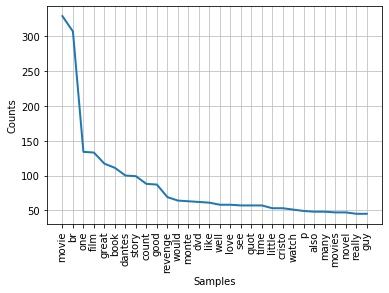

In [4]:
sample['tokenized'] = sample['review/text'].str.lower().apply(clean_words)

fdist = FreqDist([word for word in list(np.concatenate(sample['tokenized'].values))])
print("All Reviews")
most_common_toks = fdist.plot(30)

In [14]:
positive = sample[sample['review/score'] > 4]
negative = sample[sample['review/score'] <= 4]

fdistP = FreqDist([word for word in list(np.concatenate(positive['tokenized'].values)) 
                  if word.isalpha() and word not in stopwords])
fdistN = FreqDist([word for word in list(np.concatenate(negative['tokenized'].values)) 
                  if word.isalpha() and word not in stopwords])

Positive Reviews


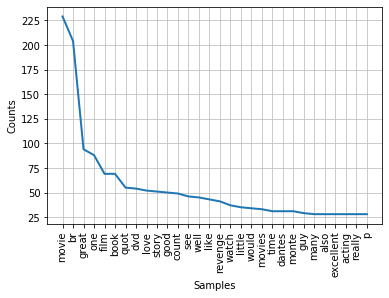

Negative Reviews


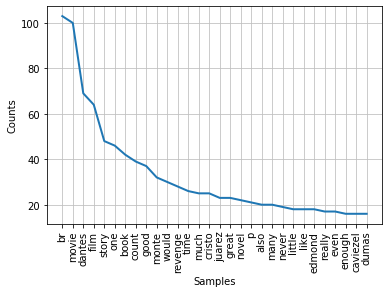

In [15]:
print("Positive Reviews")
most_common_pos = fdistP.plot(30)
print("Negative Reviews")
most_common_neg = fdistN.plot(30)

In [16]:
def clean_biwords(row):
    words = word_tokenize(row)
    word_list = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords]
    return bigrams(word_list)
def merge_tuples(row):
    result = []
    for words in row:
        result.append(" ".join(words))
    return result

All Bigrams


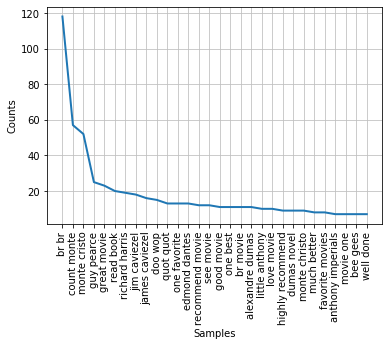

In [17]:
sample['bigrams'] = sample['review/text'].apply(clean_biwords)
sample['bigrams'] = sample['bigrams'].apply(list).apply(merge_tuples)

fdistB = FreqDist([word for word in list(np.concatenate(sample['bigrams'].values))])
print('All Bigrams')
fdistB.plot(30)

In [18]:
positive = sample[sample['review/score'] > 4]
negative = sample[sample['review/score'] <= 4]

fdistBP = FreqDist([word for word in list(np.concatenate(positive['bigrams'].values))]) 
fdistBN = FreqDist([word for word in list(np.concatenate(negative['bigrams'].values))])

Positive Bigrams


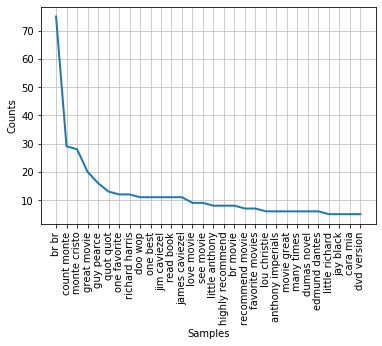

Negative Bigrams


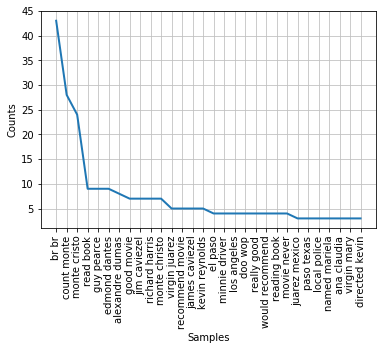

In [19]:
print("Positive Bigrams")
most_common_pos = fdistBP.plot(30)
print("Negative Bigrams")
most_common_neg = fdistBN.plot(30)

In [21]:
print(sample[sample['review/score'] < 5].shape)
sample.shape

(65, 11)


(217, 11)